# Single Family Collection

In [1]:
# Import libraries
import swolfpy as sp
import swolfpy_inputdata as spid
import swolfpy_processmodels as sppm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set font for plots
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "14"

# Set specs for pandas
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 200)

In [2]:
# Treatment processes
ProcessMetaData = sppm.ProcessModelsMetaData.ProcessModelsMetaData
Treatment_processes = {}
Treatment_processes['LF'] = {'input_type':ProcessMetaData['LF']['InputType'] , 'model':sppm.LF()}
Treatment_processes['Composting'] = {'input_type':ProcessMetaData['Comp']['InputType'] , 'model':sppm.Comp()}
Treatment_processes['AD'] = {'input_type':ProcessMetaData['AD']['InputType'] , 'model':sppm.AD()}
Treatment_processes['WTE'] = {'input_type':ProcessMetaData['WTE']['InputType'] , 'model':sppm.WTE()}
Treatment_processes['SS_MRF'] = {'input_type':ProcessMetaData['SS_MRF']['InputType'] , 'model':sppm.SS_MRF()}
Treatment_processes['Reprocessing'] = {'input_type':ProcessMetaData['Reproc']['InputType'] , 'model':sppm.Reproc()}
Treatment_processes['TS'] = {'input_type':ProcessMetaData['TS']['InputType'] , 'model':sppm.TS()}

# Distance
Processes = ['LF', 'Composting', 'AD', 'WTE', 'SS_MRF', 'Reprocessing', 'TS', 'Collection']
data = sppm.Distance.create_distance_table(process_names=Processes,
                                           transport_modes=['Heavy Duty Truck'],
                                           default_dist=20)
data['Heavy Duty Truck'].loc['LF', 'TS'] = 0.0
data['Heavy Duty Truck'].loc[:, 'Collection'] = [30, 30, 30, 30, 30, 30, 30, None]
distance = sppm.Distance(data)          
data['Heavy Duty Truck']

,LF,Composting,AD,WTE,SS_MRF,Reprocessing,TS,Collection
LF,NaN,20.0,20.0,20.0,20.0,20.0,0.0,30.0
Composting,NaN,NaN,20.0,20.0,20.0,20.0,20.0,30.0
AD,NaN,NaN,NaN,20.0,20.0,20.0,20.0,30.0
WTE,NaN,NaN,NaN,NaN,20.0,20.0,20.0,30.0
SS_MRF,NaN,NaN,NaN,NaN,NaN,20.0,20.0,30.0
Reprocessing,NaN,NaN,NaN,NaN,NaN,NaN,20.0,30.0
TS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0
Collection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Collection Schemes

* **Residual waste collection**
    * Midex Resiudal Waste Collection (RWC)
    * Organics (ORG) + Dry Residuals (DryRes)
    * Recyclables (REC) + Wet Residuals (WetRes)
    * Mixed Residual Waste Dropoff (MRDO)
* **Source separated services for recyclables**
    * Single Stream Recyclables (SSR)
    * Dual Stream Recyclables (DSR) 
    * Multi Stream Recyclables (MSR)
    * Multi Stream Recyclables Dropoff (MSRDO)
* **Source separated services for yard waste**
    * Source separated Yard Waste (SSYW)
    * Source separated Organics (SSO)  (Food & Yard waste)
    * Source separated Yard Waste Dropoff (SSYWDO)

## Diesel fuel use and cost in different collection schemes

In [3]:
Total_Fuel = pd.DataFrame(columns=['Total Fuel'])
Opr_Cost = pd.DataFrame(columns=['Operation Cost'])

# RWC
scheme=sppm.SF_Col.scheme()
scheme[('RWC', 'N/A', 'N/A')] = 1
model = sppm.SF_Col('Collection', scheme, Treatment_processes=Treatment_processes, Distance=distance)
model.calc()
Total_Fuel.loc['RWC',:] = [round(sum(model.col['TotalMass']*model.col['FuelMg'].fillna(0)))] / model.col_massflow.sum().sum()
Opr_Cost.loc['RWC',:] = [round(sum(model.col['TotalMass']*model.col['C_collection'].fillna(0)))] / model.col_massflow.sum().sum()

# RWC + SSR
scheme=sppm.SF_Col.scheme()
scheme[('RWC', 'N/A', 'SSR')] = 1
model = sppm.SF_Col('Collection', scheme, Treatment_processes=Treatment_processes, Distance=distance)
model.calc()
Total_Fuel.loc['RWC + SSR',:] = [round(sum(model.col['TotalMass']*model.col['FuelMg'].fillna(0)))] / model.col_massflow.sum().sum()
Opr_Cost.loc['RWC + SSR',:] = [round(sum(model.col['TotalMass']*model.col['C_collection'].fillna(0)))] / model.col_massflow.sum().sum()

# RWC + SSYW
scheme=sppm.SF_Col.scheme()
scheme[('RWC', 'SSYW', 'N/A')] = 1
model = sppm.SF_Col('Collection', scheme, Treatment_processes=Treatment_processes, Distance=distance)
model.calc()
Total_Fuel.loc['RWC + SSYW',:] = [round(sum(model.col['TotalMass']*model.col['FuelMg'].fillna(0)))] / model.col_massflow.sum().sum()
Opr_Cost.loc['RWC + SSYW',:] = [round(sum(model.col['TotalMass']*model.col['C_collection'].fillna(0)))] / model.col_massflow.sum().sum()

# RWC + 50% SSYW + 50% SSR
scheme=sppm.SF_Col.scheme()
scheme[('RWC', 'SSYW', 'N/A')] = 0.5
scheme[('RWC', 'N/A', 'SSR')] = 0.5
model = sppm.SF_Col('Collection', scheme, Treatment_processes=Treatment_processes, Distance=distance)
model.calc()
Total_Fuel.loc['RWC + 50% SSYW + 50% SSR',:] = [round(sum(model.col['TotalMass']*model.col['FuelMg'].fillna(0)))] / model.col_massflow.sum().sum()
Opr_Cost.loc['RWC + 50% SSYW + 50% SSR',:] = [round(sum(model.col['TotalMass']*model.col['C_collection'].fillna(0)))] / model.col_massflow.sum().sum()

# RWC + SSO
scheme=sppm.SF_Col.scheme()
scheme[('RWC', 'SSO', 'N/A')] = 1
model = sppm.SF_Col('Collection', scheme, Treatment_processes=Treatment_processes, Distance=distance)
model.calc()
Total_Fuel.loc['RWC + SSO',:] = [round(sum(model.col['TotalMass']*model.col['FuelMg'].fillna(0)))] / model.col_massflow.sum().sum()
Opr_Cost.loc['RWC + SSO',:] = [round(sum(model.col['TotalMass']*model.col['C_collection'].fillna(0)))] / model.col_massflow.sum().sum()

# RWC + SSR & SSYW
scheme=sppm.SF_Col.scheme()
scheme[('RWC', 'SSYW', 'SSR')] = 1
model = sppm.SF_Col('Collection', scheme, Treatment_processes=Treatment_processes, Distance=distance)
model.calc()
Total_Fuel.loc['RWC + SSR & SSYW',:] = [round(sum(model.col['TotalMass']*model.col['FuelMg'].fillna(0)))] / model.col_massflow.sum().sum()
Opr_Cost.loc['RWC + SSR & SSYW',:] = [round(sum(model.col['TotalMass']*model.col['C_collection'].fillna(0)))] / model.col_massflow.sum().sum()

# RWC + SSR & SSO
scheme=sppm.SF_Col.scheme()
scheme[('RWC', 'SSO', 'SSR')] = 1
model = sppm.SF_Col('Collection', scheme, Treatment_processes=Treatment_processes, Distance=distance)
model.calc()
Total_Fuel.loc['RWC + SSR & SSO',:] = [round(sum(model.col['TotalMass']*model.col['FuelMg'].fillna(0)))] / model.col_massflow.sum().sum()
Opr_Cost.loc['RWC + SSR & SSO',:] = [round(sum(model.col['TotalMass']*model.col['C_collection'].fillna(0)))] / model.col_massflow.sum().sum()

### Fuel use

,Total Fuel
RWC,5.430930
RWC + SSR,8.195958
RWC + 50% SSYW + 50% SSR,8.281900
RWC + SSYW,8.367828
RWC + SSO,9.006861
RWC + SSR & SSYW,11.132870
RWC + SSR & SSO,11.771890


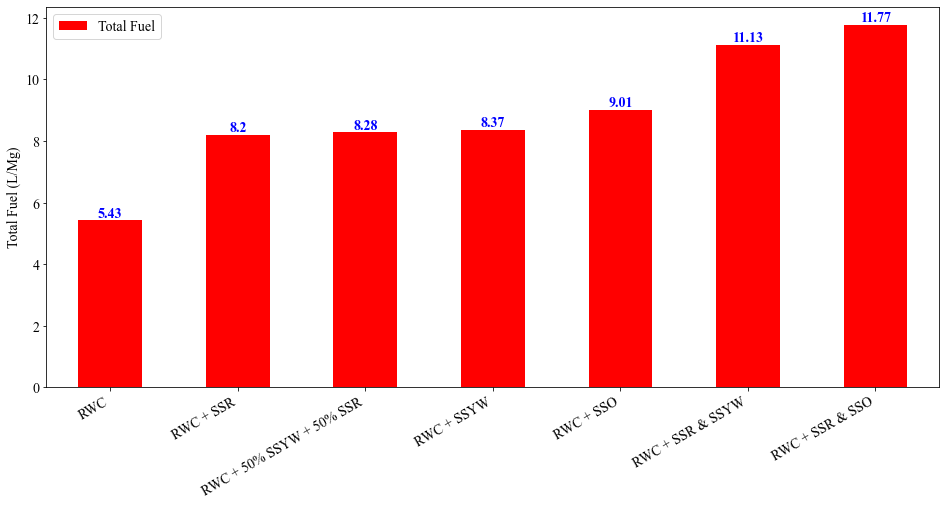

In [4]:
fig, ax = plt.subplots(figsize=(16, 7))
Total_Fuel.sort_values(by='Total Fuel', inplace=True)
Total_Fuel.plot(kind='bar', ax=ax, color='r')
xticklabels = ax.set_xticklabels(Total_Fuel.index, rotation=30, horizontalalignment='right')
ylabel = ax.set_ylabel('Total Fuel (L/Mg)')

for i, j in enumerate(Total_Fuel.index):
    ax.text(i, Total_Fuel['Total Fuel'][j], str(round(Total_Fuel['Total Fuel'][j],2)),
            ha='center', va='bottom',
            color='blue', fontweight='bold')
Total_Fuel

In [5]:
(8.195958 + 8.367828) / 2

8.281893

In [6]:
(5.430930 + 11.132870) / 2

8.2819

In [7]:
8.195958 + 8.367828 - 5.430930

11.132856

## Cost

,Operation Cost
RWC,35.967782
RWC + SSR,52.902324
RWC + 50% SSYW + 50% SSR,53.364100
RWC + SSYW,53.825863
RWC + SSO,54.956409
RWC + SSR & SSYW,70.760405
RWC + SSR & SSO,71.890951


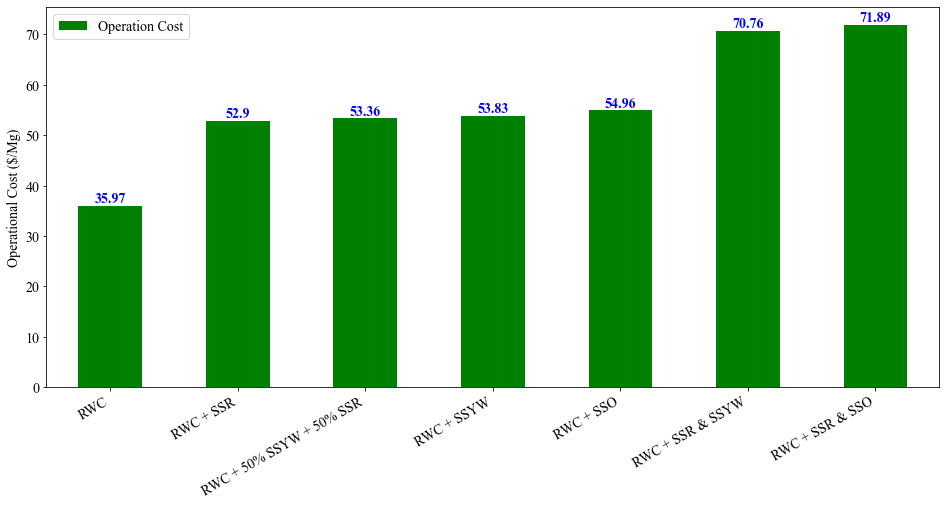

In [8]:
fig, ax = plt.subplots(figsize=(16, 7))
Opr_Cost.sort_values(by='Operation Cost', inplace=True)
Opr_Cost.plot(kind='bar', ax=ax, color='g')
xticklabels = ax.set_xticklabels(Opr_Cost.index, rotation=30, horizontalalignment='right')
ylabel = ax.set_ylabel('Operational Cost ($/Mg)')

for i, j in enumerate(Opr_Cost.index):
    ax.text(i, Opr_Cost['Operation Cost'][j], str(round(Opr_Cost['Operation Cost'][j],2)),
            ha='center', va='bottom',
            color='blue', fontweight='bold')

Opr_Cost

In [9]:
(53.825863 + 52.902324) / 2

53.364093499999996

In [10]:
(35.97 + 70.76) / 2

53.365